# Table of Contents
### 1. Importing libraries and data
### 2. Preparing data for analysis
### 3. The elbow technique
### 4. k-means clustering

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Enable matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\radav\OneDrive\Documents\Career Foundry\Data Analytics\Immersion\Achievement 6 Advanced Analytics and Dashboard Design\Olist'

In [4]:
# Import Olist data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_merged_cleaned.csv'), index_col=[0])

In [5]:
# Check dataset

df.head()

,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_sequential,payment_type,payment_installments,payment_value,act_delivery_days,seller_delivery_days,carrier_delivery_days,est_less_act_delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,1,credit_card,1,18.12,8.0,2.0,6.0,7.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,3,voucher,1,2.00,8.0,2.0,6.0,7.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,2,voucher,1,18.59,8.0,2.0,6.0,7.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,4.0,1,boleto,1,141.46,12.0,0.0,12.0,5.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,5.0,1,credit_card,3,179.12,9.0,0.0,9.0,17.0


In [6]:
df.shape

(99861, 18)

## 2. Preparing data for analysis

In [7]:
# Subset numerical columns suitable for k-means clustering prior to aggregation. Exclude 'review score' as this is categorical.

df = df[['order_id','payment_value','act_delivery_days','seller_delivery_days','carrier_delivery_days','est_less_act_delivery_days']]

In [8]:
# Re-check output

df.shape

(99861, 6)

In [9]:
df.head()

,order_id,payment_value,act_delivery_days,seller_delivery_days,carrier_delivery_days,est_less_act_delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,18.12,8.0,2.0,6.0,7.0
1,e481f51cbdc54678b7cc49136f2d6af7,2.00,8.0,2.0,6.0,7.0
2,e481f51cbdc54678b7cc49136f2d6af7,18.59,8.0,2.0,6.0,7.0
3,53cdb2fc8bc7dce0b6741e2150273451,141.46,12.0,0.0,12.0,5.0
4,47770eb9100c2d0c44946d9cf07ec65d,179.12,9.0,0.0,9.0,17.0


In [10]:
agg_functions = {'payment_value': 'sum', 
                 'act_delivery_days': 'first',
                 'seller_delivery_days': 'first',
                 'carrier_delivery_days': 'first', 
                 'est_less_act_delivery_days': 'first'}
df_new = df.groupby(df['order_id']).aggregate(agg_functions).reset_index()

In [11]:
# Check output

df_new.shape

(95076, 6)

In [12]:
df_new.head()

,order_id,payment_value,act_delivery_days,seller_delivery_days,carrier_delivery_days,est_less_act_delivery_days
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,7.0,6.0,1.0,8.0
1,00018f77f2f0320c557190d7a144bdd3,259.83,16.0,8.0,8.0,2.0
2,000229ec398224ef6ca0657da4fc703e,216.87,7.0,1.0,6.0,13.0
3,00024acbcdf0a6daa1e931b038114c75,25.78,6.0,2.0,4.0,5.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,25.0,11.0,13.0,15.0


In [13]:
# Subset numerical data only for k-means clustering 

sub = df_new[['payment_value','act_delivery_days','seller_delivery_days','carrier_delivery_days','est_less_act_delivery_days']]

In [14]:
# Check output

sub.head()

,payment_value,act_delivery_days,seller_delivery_days,carrier_delivery_days,est_less_act_delivery_days
0,72.19,7.0,6.0,1.0,8.0
1,259.83,16.0,8.0,8.0,2.0
2,216.87,7.0,1.0,6.0,13.0
3,25.78,6.0,2.0,4.0,5.0
4,218.04,25.0,11.0,13.0,15.0


## 3. The elbow technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\radav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\radav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\radav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\radav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\radav\anaconda3\Lib\site-packages\sklearn\clust

[-4573686761.720817,
 -2091268373.019644,
 -1261376977.0645747,
 -855119151.3768723,
 -628079423.4749105,
 -481162543.8870912,
 -363065338.33580226,
 -284034528.26747257,
 -234619581.77081454]

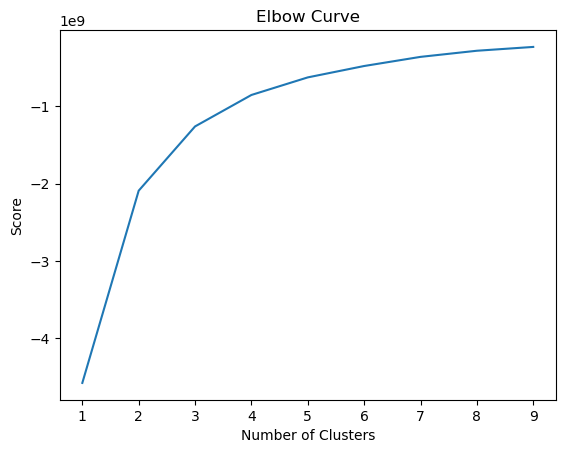

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### In this chart, the jumps are quite large until around 4 on the x-axis, but after that the curve straightens out more significantly. Given that there is also some visible flattening between 3 and 4, I will select the optimal count for the clusters as 3.

## 4. k-means clustering

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [19]:
# Fit the k-means object to the data.

kmeans.fit(sub)

C:\Users\radav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [20]:
# Add clusters column

sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\radav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# Check output

sub.head()

,payment_value,act_delivery_days,seller_delivery_days,carrier_delivery_days,est_less_act_delivery_days,clusters
0,72.19,7.0,6.0,1.0,8.0,0
1,259.83,16.0,8.0,8.0,2.0,0
2,216.87,7.0,1.0,6.0,13.0,0
3,25.78,6.0,2.0,4.0,5.0,0
4,218.04,25.0,11.0,13.0,15.0,0


In [22]:
sub['clusters'].value_counts()

clusters
0    85246
1     8948
2      882
Name: count, dtype: int64

#### i) Analyze relationship between estimated less actual delivery days and carrier delivery days

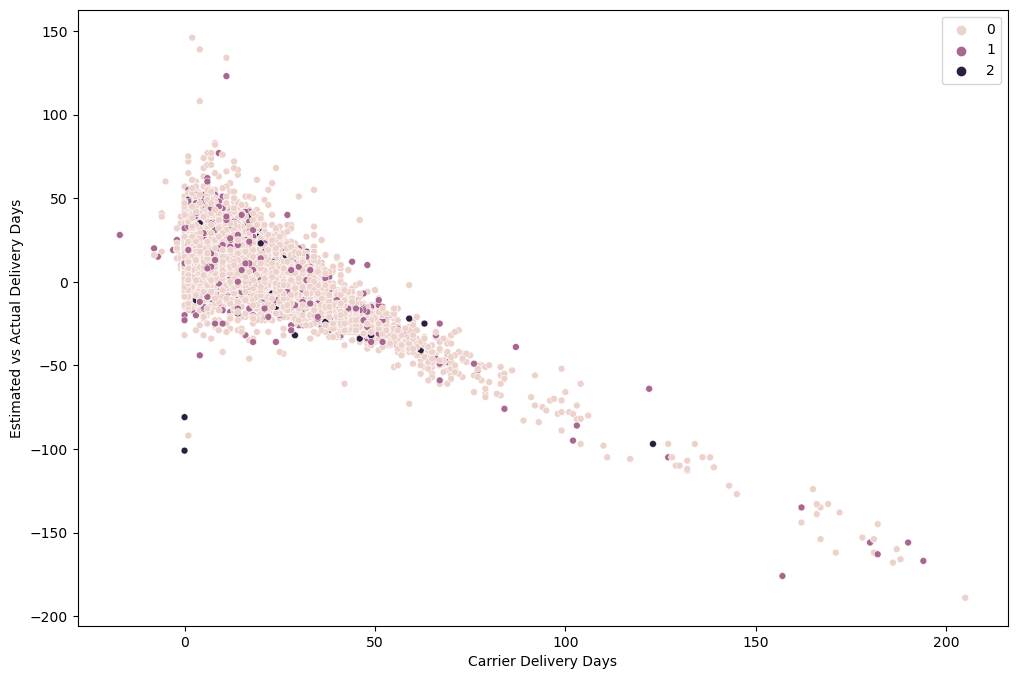

In [23]:
# Plot the clusters for the 'carrier_delivery_days' and 'est_less_act_delivery_days' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['carrier_delivery_days'], y=sub['est_less_act_delivery_days'], hue=kmeans.labels_, s=25) 
# Subsetting `X` for the x and y arguments to avoid using their labels. 

ax.grid(False)
plt.xlabel('Carrier Delivery Days')
plt.ylabel('Estimated vs Actual Delivery Days')
plt.show()

##### The cluster plot does not appear to be very useful with these variables. We learned from the previous supervised machine learning task that longer carrier delivery times are more likely to result in late deliveries beyond the estimated delivery date communicated to the customer when they placed an order. It is therefore expected that there is a downward pattern in the data points. But the clustering is not adding any insight as there appears to be the same downward slope across all cluster colors in proportion to the total data points for each cluster.

#### ii) Analyze relationship between payment value and actual delivery days

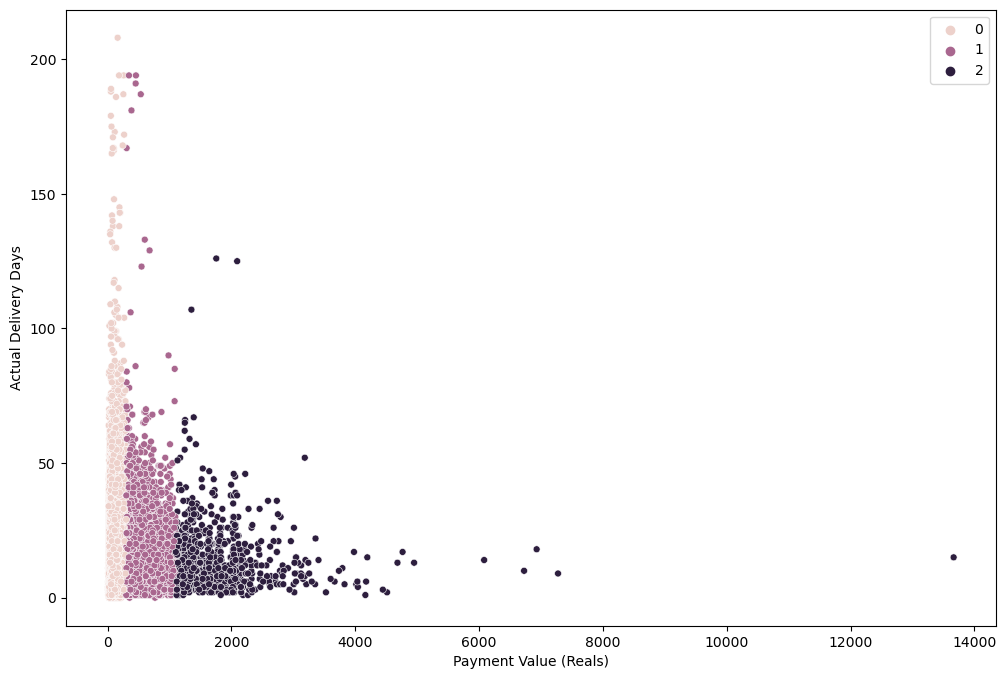

In [24]:
# Plot the clusters for the 'payment_value' and 'act_delivery_days' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['payment_value'], y=sub['act_delivery_days'], hue=kmeans.labels_, s=25) 

ax.grid(False)
plt.xlabel('Payment Value (Reals)')
plt.ylabel('Actual Delivery Days')
plt.show()

##### This cluster plot has separated the data points according to value of order size with the dark purple representing high value orders and the pink low value orders. The scatterplot is somewhat deceptive as it looks as though there are more high value orders than low value, but we know from the value count function that the reverse is true and there must be thousands of overlapping pink/low value data points that aren't clearly visible. The scatterplot makes it look like there are a higher proportion of low value orders that take a longer time to deliver, but we need to validate this later in the task by running descriptive stats.

#### iii) Analyze relationship between payment value and estimated less actual delivery days

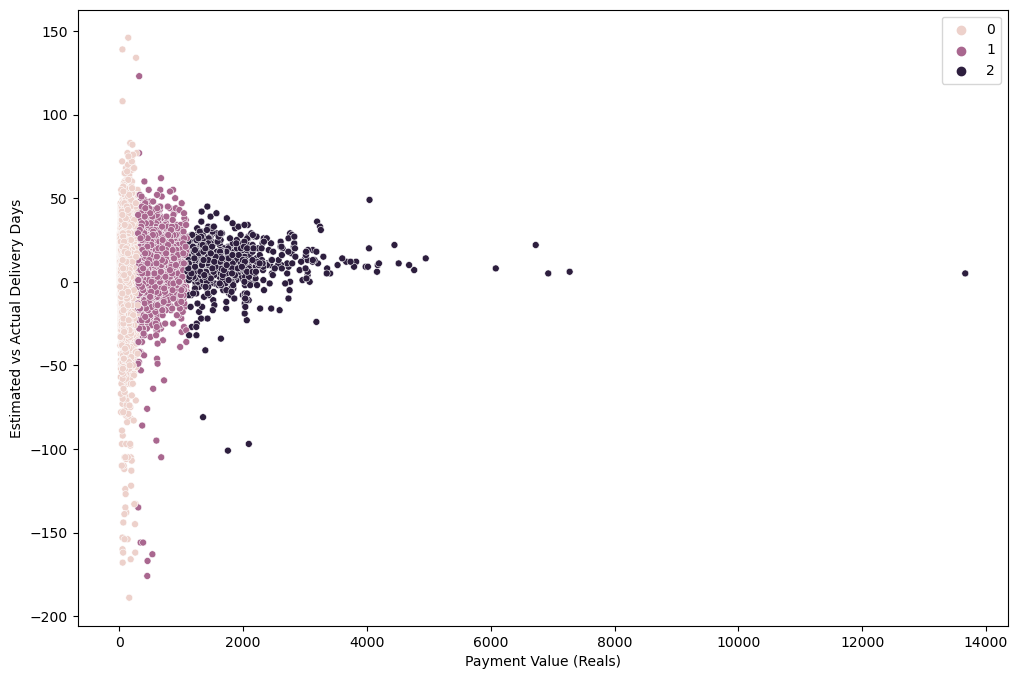

In [25]:
# Plot the clusters for the 'payment_value' and 'est_less_act_delivery_days' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['payment_value'], y=sub['est_less_act_delivery_days'], hue=kmeans.labels_, s=25) 

ax.grid(False)
plt.xlabel('Payment Value (Reals)')
plt.ylabel('Estimated vs Actual Delivery Days')
plt.show()

##### This is similar to the previous cluster plot where it looks as though there are more late deliveries (negative numbers on the y-axis) among low value orders compared to the other clusters. However, since we know the pink/low value order cluster is far larger than the other clusters, it could be that visually we are not able to clearly compare the proportion of late deliveries in each cluster. We need to validate with the descriptive stats. 

#### iv) Descriptive statistics of the clusters

In [26]:
# Identify clusters by color

sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

In [27]:
# Calculate descriptive statistics

sub.groupby('cluster').agg({'payment_value': ['mean','median'], 
                            'act_delivery_days': ['mean','median'], 
                            'seller_delivery_days': ['mean','median'], 
                            'carrier_delivery_days': ['mean','median'], 
                            'est_less_act_delivery_days': ['mean','median']})

payment_value          act_delivery_days         \
                     mean   median              mean median   
cluster                                                       
dark purple   1708.326134  1471.51         13.477324   10.0   
pink           109.700368    94.87         11.481196    9.0   
purple         491.310010   418.04         13.111422   11.0   

            seller_delivery_days        carrier_delivery_days         \
                            mean median                  mean median   
cluster                                                                
dark purple             3.689342    2.0              9.325397    7.0   
pink                    2.251719    1.0              8.761326    7.0   
purple                  2.890702    2.0              9.749106    7.0   

            est_less_act_delivery_days         
                                  mean median  
cluster                                        
dark purple                  11.181406   12.0  
pink                         10.833412   11.0  
purple                       11.416182   12.0

##### As suspected, the descriptive stats are not showing much difference across all of the clusters other than in the payment value size. Although the scatterplots appeared to show more problems with late deliveries among low value orders, the stats demonstrate that there isn't much difference in proportion to each cluster size. Pink/low value orders do have the fastest delivery times but in relation to meeting the estimated delivery date at time of order, they actually have a slightly lower mean and median number of days of actual delivery time below estimate. There is no difference across clusters in the median carrier delivery days and it would have helped to draw more insight on what kind of orders are more likely to impact carrier delivery times.


#### Key observations and next steps from the k-means clustering:
   1.  The k-means algorithm was less useful with this particular subset of the Olist dataset than the regression analysis conducted previously that tested a specific hypothesis that poor performance from Olist's carrier partners was the dominant reason for orders with slow delivery times.
   2. Even though there wasn't a dramatic discovery from applying the k-means algorithm, there was still some value in learning from the clusters based on total order value that the different time components of order fulfilment do not appear to be linked to order value. For example, it would perhaps be a concern for the business if the analysis had shown that important, high value orders were being delivered more slowly. On the contrary, the descriptive stats showed that high value orders marginally had the best performance in terms of average days that orders were received by customers before the estaimted delivery date communicated at the time of order (mean of 11.4 days).
   3. The k-means algorithm would have been more useful with a dataset with more continuous numerical variables. The Olist dataset has more time and categorical variables. The main focus of my analysis on the Olist dataset are questions such as: 1) what is causing deliveries to be late?, 2) what is causing low customer review scores, and 3) what is the concentration of orders geographically and among top customers?. These are better suited to other types of data analysis, for example, methodologies that are better suited to categorical variables like review scores.